### 데이터 로드 및 결측치 처리

In [219]:
import pandas as pd

train_data = pd.read_csv("data/train.csv")
train_data.drop(columns=["Id"], inplace=True)

dep_var = "SalePrice"
ind_vars = []
numerical_vars = []
categorical_vars = []

for col in train_data.columns:
    ind_vars.append(col)
    if train_data[col].dtype == "object":
        categorical_vars.append(col)
    else:
        numerical_vars.append(col)

ind_vars.remove(dep_var)
# print(numerical_vars)
# print(categorical_vars)

null_true_cols = []
for col in train_data.columns:
    null_cnt = len(train_data[train_data[col].isnull() == True])
    if col in numerical_vars and null_cnt > 0:
        print("결측치 {} : {}".format(col, null_cnt))
        null_true_cols.append(col)
null_true_cols

train_data_temp = train_data.copy()
for col in null_true_cols:
    null_cnt = len(train_data[train_data[col].isnull() == True])
    if null_cnt > 100:
        train_data_temp.drop(columns=[col], inplace=True)
        numerical_vars.remove(col)
        print("{}열의 결측치 갯수가 {}개여서 열을 제거함".format(col, null_cnt))
    else:
        this_mean = train_data_temp[col].mean()
        train_data_temp.loc[(train_data[col].isnull()), col] = this_mean
        print("{}열의 결측치를 평균값({:.2f})으로 대체함".format(col, this_mean))
    
train_data = train_data_temp.copy()
train_data

결측치 LotFrontage : 259
결측치 MasVnrArea : 8
결측치 GarageYrBlt : 81
LotFrontage열의 결측치 갯수가 259개여서 열을 제거함
MasVnrArea열의 결측치를 평균값(103.69)으로 대체함
GarageYrBlt열의 결측치를 평균값(1978.51)으로 대체함


,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [220]:
#수치형 데이터를 먼저 표준화함
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(train_data[numerical_vars]) # x객체에 x를 표준화한 데이터를 저장
df = pd.DataFrame(x, columns=numerical_vars)
df[dep_var] = train_data[dep_var]
df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,-0.944591,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,208500
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,-0.641228,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,181500
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,-0.301643,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,223500
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,-0.061670,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,140000
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,-0.174865,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,0.873321,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,175000
1456,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,0.049262,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,210000
1457,0.309859,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,0.701265,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,266500
1458,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,-1.284176,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,142125


### 이상치 체크

4분위 기준 이상치 수 : 61/1460개


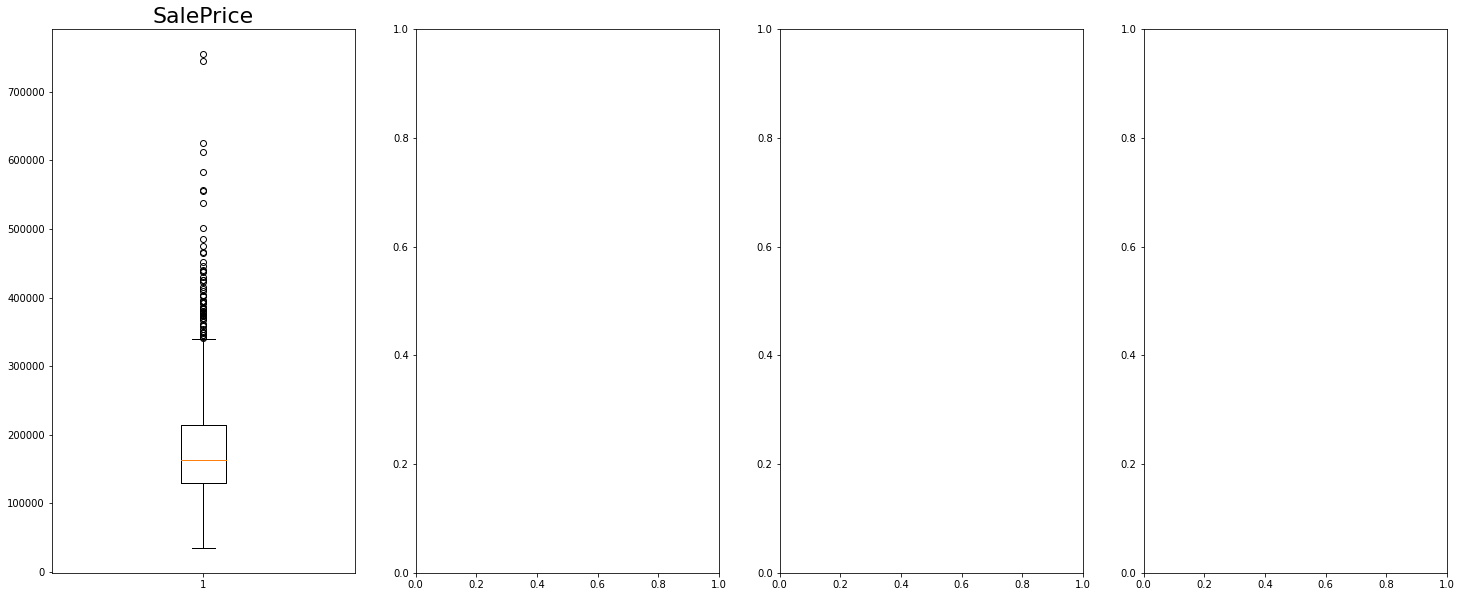

In [221]:
import math
import matplotlib.pyplot as plt
import adptools.preprocessing as pp
from adptools.graphics import boxplotss

df_outliers = pp.get_outlier_df(df, target_vars=[dep_var])
print("4분위 기준 이상치 수 : {}/{}개".format(df_outliers["_outlier"].sum(), len(df)))

df_cleaned = pp.handle_outlier(df, target_vars=[dep_var])
df_cleaned_index = df_cleaned.index.to_list()
train_data2 = train_data.copy()
for i in train_data.index:
    if train_data.index[i] in df_cleaned_index:
        continue
    train_data2.drop(index = train_data.index[i], inplace=True)
train_data = train_data2.copy()

train_data
boxplotss([dep_var], df)
#이상치가 의미 있는 데이터로 보이며 그 수도 너무 많음. 4분위수 이상치 제거는 오히려 역효과

## 변수선택 or 차원 축소

In [195]:
from adptools.VariableSelector import VariableSelector

ind_vars = numerical_vars.remove(dep_var)
selector = VariableSelector(numerical_vars, dep_var, train_data)
selected_vars = selector.stepwise_selection()

Alert! Too many x variables! (less than 30 variables are recommended)
It will may occur some errors!


MiscVal 변수를 제거합니다.
BsmtHalfBath 변수를 제거합니다.
_3SsnPorch 변수를 제거합니다.
후보 독립변수들 : 
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '_1stFlrSF', '_2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '_3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


단계적 선택법 선택변수 : 
['OverallQual', 'GrLivArea', 'YearBuilt', 'MSSubClass', 'BsmtFullBath', 'GarageCars', 'OverallCond', 'Fireplaces', 'YearRemodAdd', 'LotArea', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'TotalBsmtSF', 'FullBath', 'KitchenAbvGr']




In [227]:
#범주형 변수를 더미 변수로 변환
dms = pd.get_dummies(train_data[categorical_vars])
df = pd.concat([train_data[selected_vars], dms], axis=1)
df[dep_var] = train_data[dep_var]

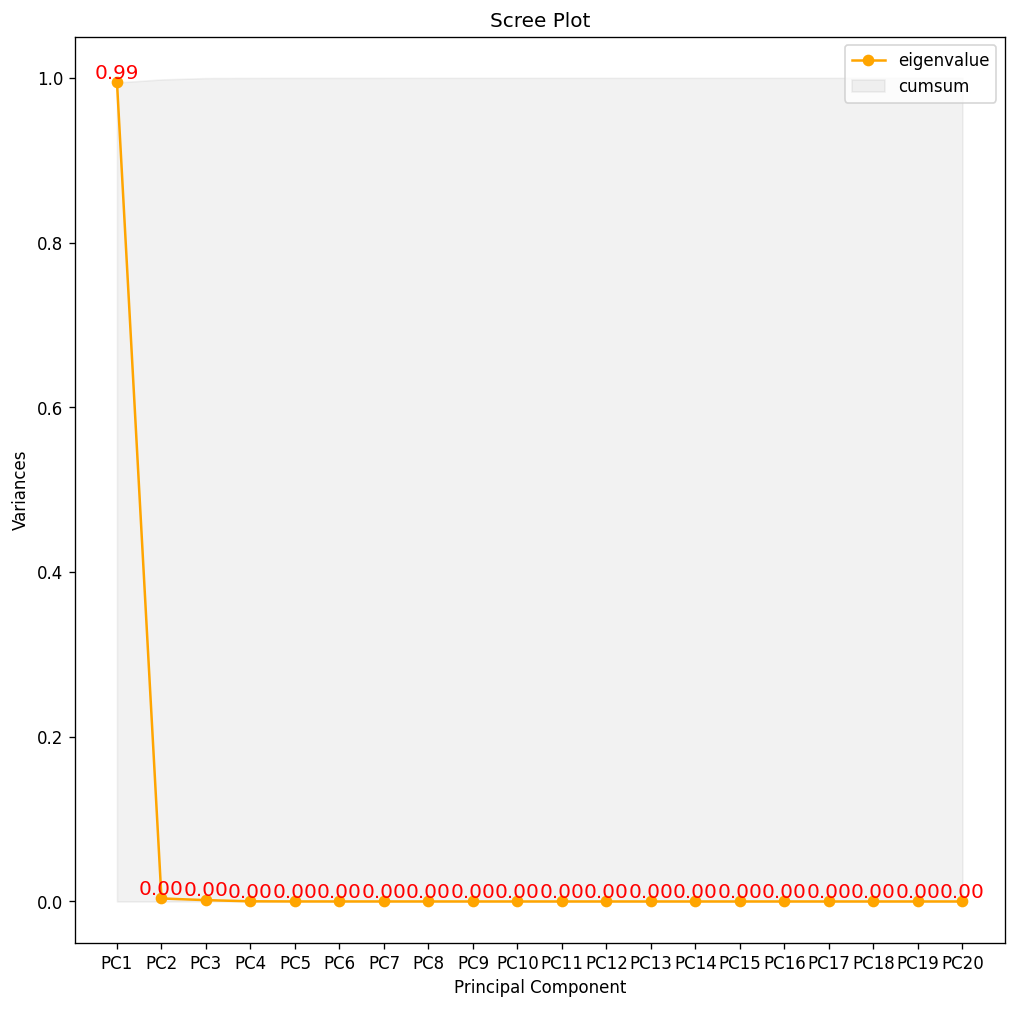

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,SalePrice
0,-1703.563871,138.044942,-265.430200,-86.036484,-22.621586,-1.426680,-5.390558,-43.836454,-0.979186,0.396286,...,0.056289,0.176178,1.320966,-0.427542,-1.139088,-0.110538,0.284479,0.431128,-0.332177,208500
1,-554.995387,-29.957811,319.450542,207.465737,-0.606358,-30.876930,-0.350170,9.212413,-8.398565,-2.178913,...,1.093448,0.274302,0.008407,0.080788,0.026730,-0.593248,-0.496471,-0.044052,0.364805,181500
2,1097.850157,180.441158,-258.277791,-95.413979,-24.442280,0.228948,-6.652948,-40.298789,-1.061303,0.185032,...,-0.622839,1.363195,0.583000,-0.530558,-0.766646,-0.026584,-0.129462,0.433382,-0.310300,223500
3,-604.924441,66.323274,-357.920173,-88.515375,-16.494064,-9.354209,5.631812,45.084917,11.030180,0.984971,...,-1.776642,0.464194,-1.752617,-1.075178,-0.219211,0.306947,-0.341797,-0.062925,0.278684,140000
4,4116.967693,597.179521,-294.851423,68.438663,-18.665879,-5.644645,-12.168700,-22.901828,-4.380620,0.204647,...,-0.686256,0.937777,-0.032348,-0.722916,-1.055446,0.309630,0.094171,0.161339,-0.417355,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,-2236.241914,147.717255,-148.899346,-86.790886,-22.670186,1.195569,-4.637107,-35.752512,-0.968995,0.310699,...,0.418346,-0.058468,0.126044,0.903446,-0.169375,-1.036374,-1.102858,-0.554986,-0.520762,175000
1395,3035.576056,734.074728,111.527585,214.576141,-8.332830,-40.223766,-8.009296,14.168068,-2.934638,-1.292492,...,-0.277474,-0.606361,-0.046035,-0.343582,0.171448,-1.519462,-0.780796,-0.894202,0.296707,210000
1396,-1098.162539,814.295155,-358.666601,-122.046183,-28.241338,-8.265723,-3.849427,20.950435,28.244741,-2.536634,...,0.401487,0.870821,1.389581,0.181804,0.857346,-0.526675,-0.478712,0.071687,0.783018,266500
1397,-443.003354,-282.862270,263.860269,287.556695,7.747973,-34.910872,2.155993,18.750023,21.698919,0.041028,...,-0.362368,-0.421700,0.841187,-1.001771,0.459631,0.172592,0.609575,0.964612,0.446938,142125


In [228]:
from adptools.pca import Reducer
ind_vars = df.columns.to_list()
ind_vars.remove(dep_var)
df.reset_index(inplace=True)
reducer = Reducer(ind_vars, dep_var, df, n_components=20)
reducer.scree_plot(dpi=120)
reducer.principal_df

## 여러 모델로 돌려보기

In [229]:
from sklearn.model_selection import train_test_split

ind_vars = df.columns.to_list()
ind_vars.remove(dep_var)
X_train, X_test, y_train, y_test = train_test_split(principal_df[["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"]], principal_df[dep_var], test_size=0.2)

In [230]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

start_time = time.time()
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)
predicted = model.predict(X_test)

pred = pd.DataFrame(data=predicted, columns=["predict"])
pred[dep_var] = y_test.to_list()
pred["predict_scaled"] = minmax_scale(pred["predict"], (pred["predict"].min(), pred["predict"].max()))
pred["residual"] = pred[dep_var] - pred["predict_scaled"]
end_time = time.time()

mse = mean_squared_error(pred[dep_var], pred["predict"])
mae = mean_absolute_error(pred[dep_var], pred["predict"])

print("모델링 시간 : {:.2f}초".format(end_time - start_time))
print("MSE : {:.2f} / MAE : {:.2f}".format(mse, mae))
display(pred)
pred.describe()

모델링 시간 : 4.83초
MSE : 681218603.69 / MAE : 18731.36


,predict,SalePrice,predict_scaled,residual
0,94698.800,83000,94698.800,-11698.800
1,250133.718,230000,250133.718,-20133.718
2,167570.716,163900,167570.716,-3670.716
3,144498.897,205000,144498.897,60501.103
4,147056.854,102000,147056.854,-45056.854
...,...,...,...,...
275,260838.731,266000,260838.731,5161.269
276,257518.064,277000,257518.064,19481.936
277,209291.496,214000,209291.496,4708.504
278,94713.376,94500,94713.376,-213.376


,predict,SalePrice,predict_scaled,residual
count,280.000000,280.000000,280.000000,280.000000
mean,170786.674593,171874.664286,170786.674593,1087.989693
std,52289.541403,60360.273633,52289.541403,26124.170477
min,75408.673000,52000.000000,75408.673000,-132079.650000
25%,132640.134500,128375.000000,132640.134500,-11510.471250
50%,157921.304500,159717.000000,157921.304500,-101.528000
75%,203218.836000,206212.500000,203218.836000,14621.401750
max,296680.212000,340000.000000,296680.212000,77168.200000


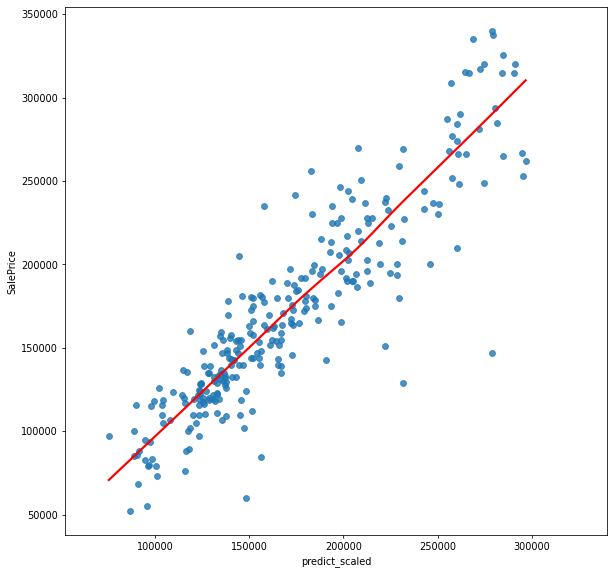

In [231]:
import seaborn as sns

plt.figure(figsize=(10, 10), dpi=70)
sns.regplot(x=pred["predict_scaled"], y=pred[dep_var], lowess=True, line_kws={'color': 'red'})
plt.xlim((pred[dep_var].min(), pred[dep_var].max()))
# plt.scatter(pred["predict"], pred[dep_var])
plt.show()

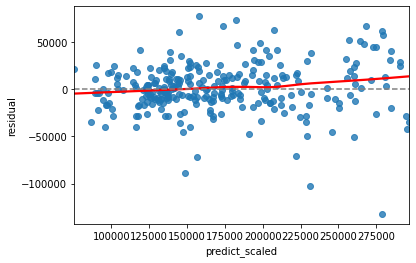

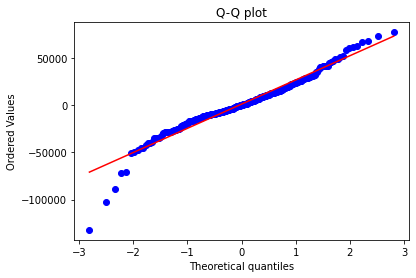

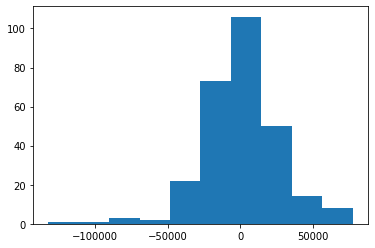

In [232]:
import seaborn as sns

sns.regplot(x=pred["predict_scaled"], y=pred["residual"], lowess=True, line_kws={'color': 'red'})
plt.plot([pred["predict_scaled"].min(), pred["predict_scaled"].max()], [0, 0], '--', color='grey')
plt.show()

from scipy import stats
stats.probplot(pred["residual"], plot=plt)
plt.title("Q-Q plot")
plt.show()

plt.hist(pred["residual"])
plt.show()

In [134]:
challenge_df = pd.read_csv("data/test.csv")

null_true_cols = []
for col in challenge_df.columns:
    null_cnt = len(challenge_df[challenge_df[col].isnull() == True])
    if col in numerical_vars and null_cnt > 0:
        print("결측치 {} : {}".format(col, null_cnt))
        null_true_cols.append(col)

for col in null_true_cols:
    this_mean = challenge_df[col].mean()
    challenge_df.loc[(challenge_df[col].isnull()), col] = this_mean

dms = pd.get_dummies(challenge_df[categorical_vars])
challenge_df = pd.concat([challenge_df[selected_vars], dms], axis=1)
x = StandardScaler().fit_transform(challenge_df) # x객체에 x를 표준화한 데이터를 저장
challenge_df = pd.DataFrame(x, columns=challenge_df.columns)

for t_col in X_train.columns:
    if t_col not in challenge_df.columns:
        challenge_df[t_col] = 0

challenge_predicted = model.predict(challenge_df)
display(challenge_predicted)

submit_df = pd.DataFrame()
submit_df["Id"] = challenge_df.index + 1461
submit_df[dep_var] = challenge_predicted
submit_df
submit_df.to_csv("210915_hrdkdh_submission.csv", index=False)

결측치 MasVnrArea : 15
결측치 BsmtFinSF1 : 1
결측치 BsmtFinSF2 : 1
결측치 BsmtUnfSF : 1
결측치 TotalBsmtSF : 1
결측치 BsmtFullBath : 2
결측치 BsmtHalfBath : 2
결측치 GarageYrBlt : 78
결측치 GarageCars : 1
결측치 GarageArea : 1


array([64829.074, 64118.174, 65081.873, ..., 66328.521, 64087.597,
       68917.892])

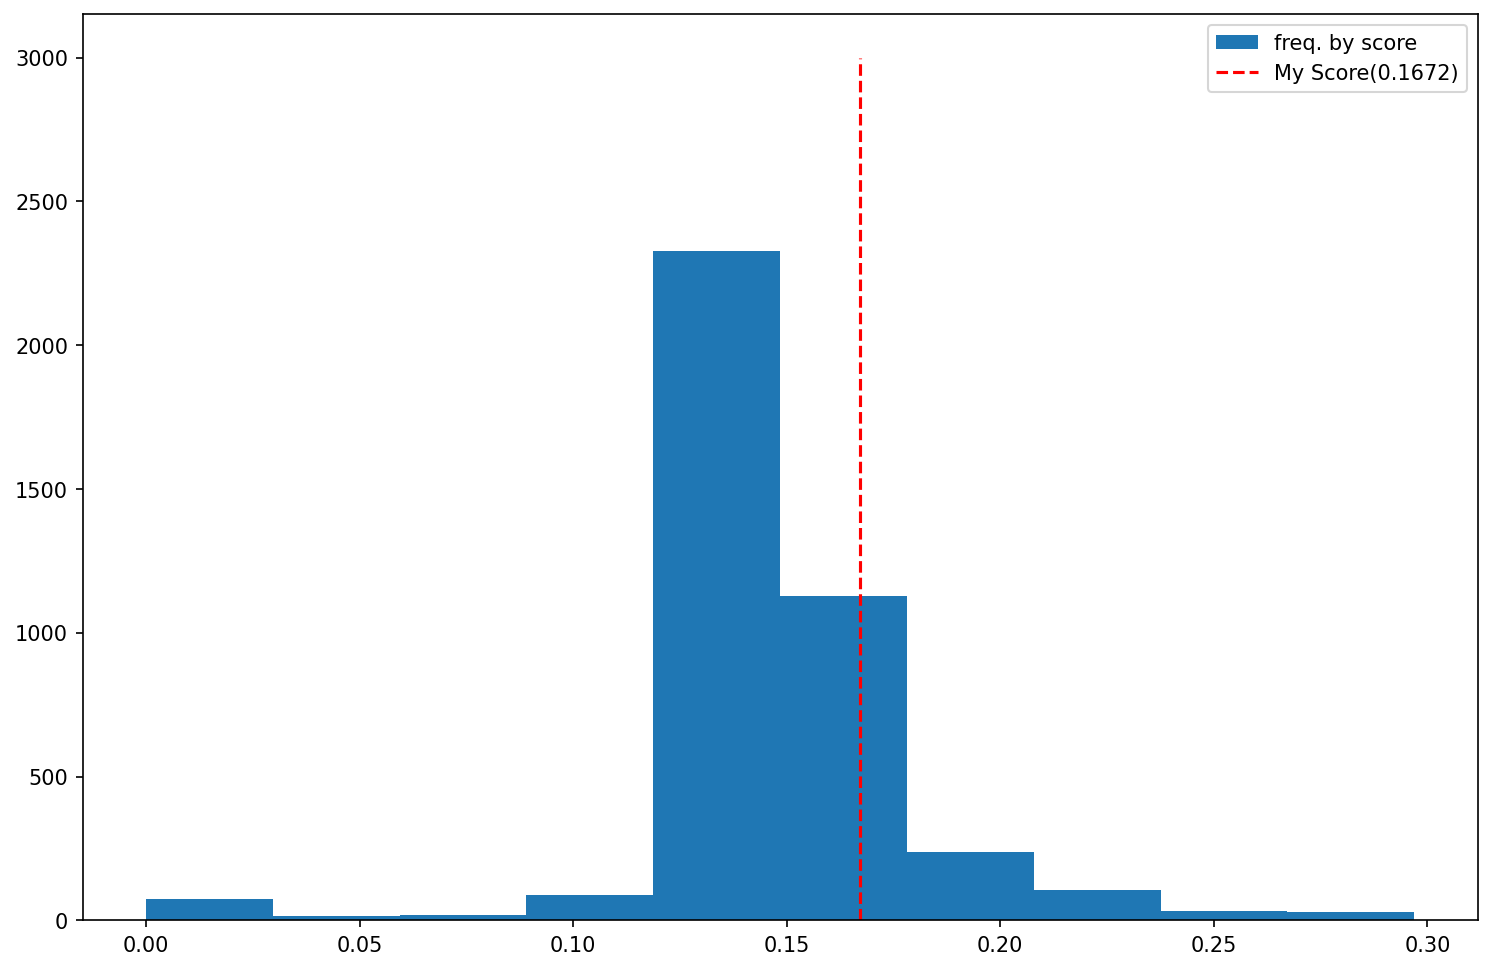

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

ldr_brd = pd.read_csv("/Users/hrdkdh/Downloads/house-prices-advanced-regression-techniques-publicleaderboard 2.csv")

ldr_brd_drop_list = ldr_brd[(ldr_brd["Score"] > 0.3)].index
ldr_brd.drop(index=ldr_brd_drop_list, inplace=True)
my_score = ldr_brd.loc[(ldr_brd["TeamName"] == "hrdkdh"), "Score"].values[0]

plt.figure(figsize=(12, 8), dpi=150)
plt.hist(ldr_brd.iloc[:-1, 3], label="freq. by score")
plt.vlines(my_score, 0, 3000, colors="red", linestyles="dashed", label="My Score({:.4f})".format(my_score))
plt.legend()
plt.show()